In [180]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report,confusion_matrix

## Titanic

In [154]:
train= pd.read_csv('titanic_train.csv')
test= pd.read_csv('titanic_test.csv')

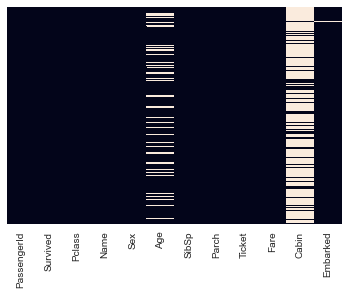

In [155]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

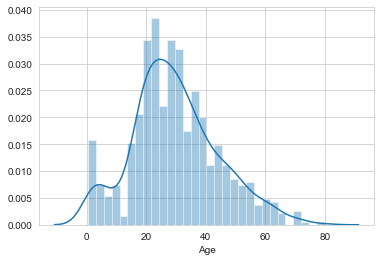

In [156]:
sns.distplot(train['Age'].dropna(),bins=30)

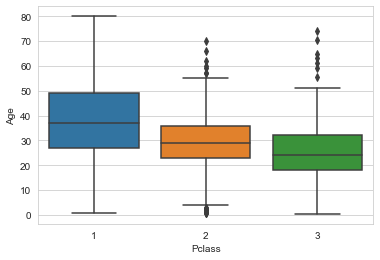

In [157]:
sns.boxplot(data=train,x='Pclass',y='Age')

In [158]:
def impute_age(cols):
    age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(age):
        
        if Pclass == 1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return age

In [159]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age']= test[['Age','Pclass']].apply(impute_age,axis=1)

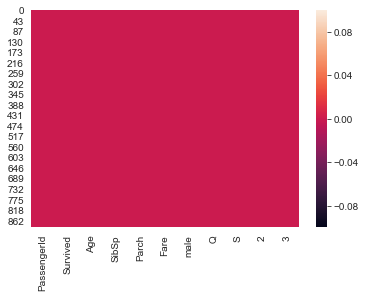

In [168]:
sns.heatmap(train.isnull())

In [161]:
test.drop(['Cabin'],axis=1,inplace=True)
train.drop(['Cabin'],axis=1,inplace=True)

In [162]:
train.dropna(inplace=True)

In [163]:
test.dropna(inplace=True)

In [164]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
Pclass=pd.get_dummies(train['Pclass'],drop_first=True)

sextest=pd.get_dummies(test['Sex'],drop_first=True)
embarktest=pd.get_dummies(test['Embarked'],drop_first=True)
Pclasstest=pd.get_dummies(test['Pclass'],drop_first=True)

In [165]:
train=pd.concat([train,sex,embark,Pclass],axis=1)
test=pd.concat([test,sextest,embarktest,Pclasstest],axis=1)

In [166]:
test.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)
train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [171]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [170]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [204]:
X_train=train.drop(['Survived'],axis=1)
y_train=train['Survived']

X_test=test

In [205]:
logmodel = LogisticRegression(solver='liblinear')

In [206]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
pred = logmodel.predict(X_test)

In [208]:
rfe=RFE(logmodel,10)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='liblinear',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

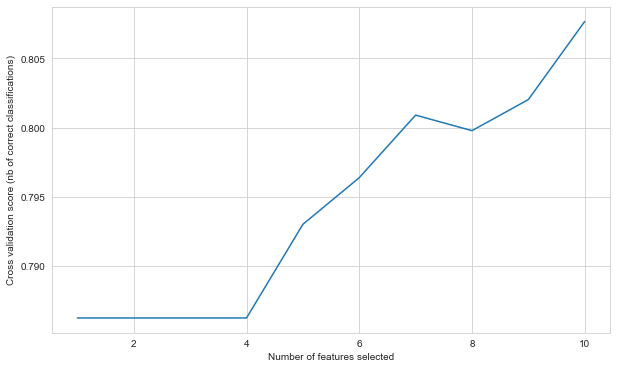

In [209]:
rfecv=RFECV(estimator=LogisticRegression(solver='liblinear'),step=1,cv=10,scoring='accuracy')
rfecv.fit(X_train,y_train)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [210]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import cross_validate

scores_accuracy = cross_val_score(logmodel, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logmodel, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logmodel, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logmodel.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logmodel.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logmodel.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression(solver='liblinear')

results = cross_validate(modelCV, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy is 0.808
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.849
K-fold cross-validation results:
LogisticRegression average accuracy: 0.808 (+/-0.033)
LogisticRegression average log_loss: 0.454 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.026)


## Advertising data set

In [3]:
df=pd.read_csv('advertising.csv')

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
df.drop(['Timestamp'],axis=1,inplace=True)

In [18]:
X=df.drop(['Clicked on Ad'],axis=1)
y=df['Clicked on Ad']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [22]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\16142\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
pred = logmodel.predict(X_test)

In [24]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[134   8]
 [ 22 136]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.94      0.86      0.90       158

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

